In [ ]:
## Gytis Gervickas Section C

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [8]:
import pandas as pd

file_path = "titanic.csv"  
titanic_data = pd.read_csv(file_path)

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [13]:
# Total number of passengers
total_passengers = len(titanic_data)

# Percentage of passengers that are male
percentage_male = (titanic_data['Sex'].value_counts(normalize=True)[1]) * 100

# Percentage of passengers that survived
percentage_survived = (titanic_data['Survived'].mean()) * 100

# Display results
print(f"Total passengers: {total_passengers}")
print(f"Percentage male: {percentage_male:.2f}%")
print(f"Percentage survived: {percentage_survived:.2f}%")


Total passengers: 891
Percentage male: 64.76%
Percentage survived: 38.38%


Your written answer:

 - <Answer 1> 891
 - <Answer 2> 64.76%
 - <Answer 3> 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [19]:
female_survival_rate = titanic_data[titanic_data['Sex'] == 0]['Survived'].mean() * 100

male_survival_rate = titanic_data[titanic_data['Sex'] == 1]['Survived'].mean() * 100

print(f"Percentage of female passengers who survived: {female_survival_rate:.2f}%")
print(f"Percentage of male passengers who survived: {male_survival_rate:.2f}%")


Percentage of female passengers who survived: 74.20%
Percentage of male passengers who survived: 18.89%


Your written answer:

 - <Answer 1> 74.20%
 - <Answer 2> 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [24]:
total_passengers = len(titanic_data)

class_analysis = titanic_data.groupby('Pclass').agg(
    percent_tickets=('Pclass', lambda x: (len(x) / total_passengers) * 100),
    percent_survived=('Survived', 'mean')
)

class_analysis['percent_survived'] = class_analysis['percent_survived'] * 100

print(class_analysis)


        percent_tickets  percent_survived
Pclass                                   
1             24.242424         62.962963
2             20.650954         47.282609
3             55.106622         24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24
    - % survivorship: 62.96
- Class 2 
    - % tickets: 20.65
    - % survivorship: 47.28
- Class 3
    - % tickets: 55.11
    - % survivorship: 24.24


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors DataFrame:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors DataFrame:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


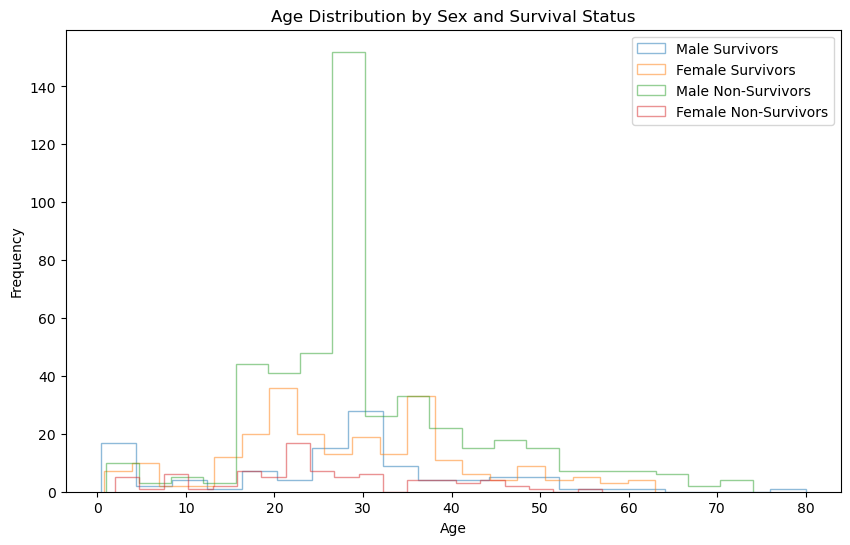

In [28]:
#Used GenAi for this problem 4 because I couldnt figure it out
import matplotlib.pyplot as plt

# Step 1: Create DataFrames for survivors and non-survivors
survivors = titanic_data[titanic_data['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = titanic_data[titanic_data['Survived'] == 0][['Age', 'Name', 'Sex']]

# Display the first five rows of each DataFrame
print("Survivors DataFrame:")
print(survivors.head())

print("\nNon-Survivors DataFrame:")
print(non_survivors.head())

# Step 2: Create histograms for age distributions by sex and survival status
plt.figure(figsize=(10, 6))

# Male survivors
plt.hist(
    survivors[survivors['Sex'] == 1]['Age'].dropna(), 
    bins=20, 
    alpha=0.5, 
    label='Male Survivors', 
    histtype='step'
)

# Female survivors
plt.hist(
    survivors[survivors['Sex'] == 0]['Age'].dropna(), 
    bins=20, 
    alpha=0.5, 
    label='Female Survivors', 
    histtype='step'
)

# Male non-survivors
plt.hist(
    non_survivors[non_survivors['Sex'] == 1]['Age'].dropna(), 
    bins=20, 
    alpha=0.5, 
    label='Male Non-Survivors', 
    histtype='step'
)

# Female non-survivors
plt.hist(
    non_survivors[non_survivors['Sex'] == 0]['Age'].dropna(), 
    bins=20, 
    alpha=0.5, 
    label='Female Non-Survivors', 
    histtype='step'
)

# Step 3: Add labels, legend, and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Sex and Survival Status")
plt.legend()
plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [31]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset (ensure the dataset is preloaded into titanic_data)
# Assuming `titanic_data` is already available in your session

# Step 1: Choose features and label
# Using 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', and 'Fare' as features
# Drop rows with missing values for simplicity
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
titanic_data_cleaned = titanic_data.dropna(subset=features + ['Survived'])

X = titanic_data_cleaned[features]
y = titanic_data_cleaned['Survived']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Choose two models (KNN and Decision Tree in this example)
# Initialize models with some default hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=5)
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Step 5: Fit models to the training data
knn_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Step 6: Create predictions
knn_predictions_train = knn_model.predict(X_train)
knn_predictions_test = knn_model.predict(X_test)

dt_predictions_train = decision_tree_model.predict(X_train)
dt_predictions_test = decision_tree_model.predict(X_test)

# Step 7: Create confusion matrices and classification reports
print("KNN - Training Data")
print(confusion_matrix(y_train, knn_predictions_train))
print(classification_report(y_train, knn_predictions_train))

print("KNN - Test Data")
print(confusion_matrix(y_test, knn_predictions_test))
print(classification_report(y_test, knn_predictions_test))

print("Decision Tree - Training Data")
print(confusion_matrix(y_train, dt_predictions_train))
print(classification_report(y_train, dt_predictions_train))

print("Decision Tree - Test Data")
print(confusion_matrix(y_test, dt_predictions_test))
print(classification_report(y_test, dt_predictions_test))


KNN - Training Data
[[402  42]
 [ 54 214]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       444
           1       0.84      0.80      0.82       268

    accuracy                           0.87       712
   macro avg       0.86      0.85      0.86       712
weighted avg       0.86      0.87      0.86       712

KNN - Test Data
[[88 17]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Decision Tree - Training Data
[[422  22]
 [ 79 189]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       444
           1       0.90      0.71      0.79       268

    accuracy                           0.86       7

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 